<h1 align = center> <font color = 'gold'> Regression Models </font><h1>



<h2 Align = center><font color = "blurple"> Import necessary libraries </h2>



In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



<h2>Importing Data

In [196]:

data = pd.read_csv('advertising.csv')

<h2><font color = "#55FF82"> Exploring Data</font></h2>

In [199]:
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [222]:



# Splitting data into features and target variable
X = data[['TV']]
y = data['Sales']

# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





<h1 align = center><font color = '#6435BB'> Linear Regression </h1>

#### What is the Linear Regression ?

Linear regression is a simple yet powerful predictive model that assumes a linear relationship between the independent variable (X) and the dependent variable (y). It uses a straight line to fit the data points and predict the target variable.

The formula for linear regression is:

y = b0 + b1 * X


#### How does Linear Regression work?

It starts by finding the best-fit slope (b1) and y-intercept (b0) using the least squares method. This means finding the values that minimize the squared differences between the predicted and actual values.

After obtaining the coefficients, the model can be used to predict the target variable for new data points.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.

The R-squared (R^2) value represents the proportion of the variance in the target variable that is explained by the model. A higher R^2 value indicates a better fit.

In this example, the Linear Regression model has the lowest MSE (0.235) and the highest R^2 (0.998), indicating a strong and accurate fit to the data.




In [223]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

yPredicted = model.predict(X_test)
mse = mean_squared_error(y_test, yPredicted)
r2 = r2_score(y_test, yPredicted)

print(f"b = {model.intercept_}")
print(f"m = {model.coef_[0]}")

print(f"Linear Regression - MSE: {mse}, R^2: {r2}")



b = 7.007108428241848
m = 0.0554829439314632
Linear Regression - MSE: 6.101072906773963, R^2: 0.802561303423698


### Plotting linear regression

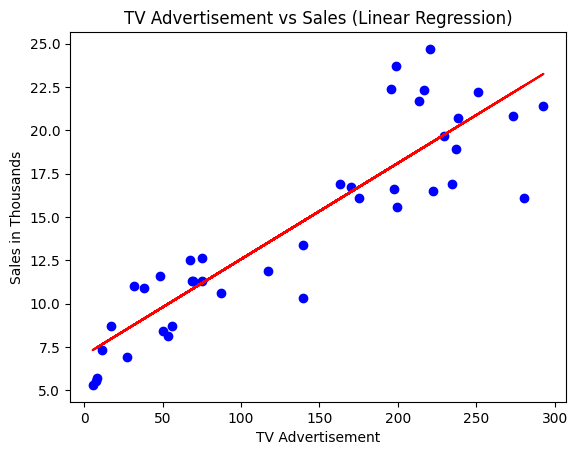

In [224]:

plt.scatter(X_test, y_test, color='blue')

plt.plot(X_test, yPredicted, color='red')

plt.title('TV Advertisement vs Sales (Linear Regression)')

plt.xlabel('TV Advertisement')

plt.ylabel('Sales in Thousands')

plt.show()

<h1 align = center><font color = '#99DDAB'> L1 and L2 Normalization </h1>

#### What is L1 Normalization ?

L1 normalization, also known as Lasso regression, adds a penalty term to the loss function to promote sparsity (i.e., having a small number of non-zero coefficients). The penalty term is a sum of the absolute values of the coefficients.

The main difference between Lasso Regression and Linear Regression is that Lasso Regression tends to shrink the coefficients towards zero, while Linear Regression does not. This can help prevent overfitting by reducing the variance of the model.

Formula :

y = b0 + b1 * X + alpha * sum(b)^2

#### What is L2 Normalization?

L2 normalization, also known as Ridge regression, adds a penalty term to the loss function to promote sparsity (i.e., having a small number of non-zero coefficients). The penalty term is a sum of the squares of the coefficients.

The main difference between Lasso Regression and Linear Regression is that Lasso Regression tends to shrink the coefficients towards zero, while Linear Regression does not. This can help prevent overfitting by reducing the variance of the model.

Formula :

y = b0 + b1 * X + alpha * sum(b^2)

#### Why Formula is same ?

Both Lasso and Ridge Regression use the same formula for the loss function, but they add a penalty term to the coefficients. The penalty term is chosen based on the type of regularization (L1 or L2) and the value of alpha. The larger the value of alpha, the stronger the penalty term, and the coefficients will be shrunk towards zero.



<h1 align = center><font color = '#9935AB'> Ridge Regression </h1>



#### What is Ridge Regression?

Ridge regression is a regularized version of linear regression that adds a penalty term to the loss function to prevent overfitting. The penalty term is a squared sum of the absolute values of the coefficients (L1 regularization), or the sum of the squares of the coefficients (L2 regularization).

The main difference between Ridge Regression and Linear Regression is that Ridge Regression tends to shrink the coefficients towards zero, while Linear Regression does not. This can help prevent overfitting by reducing the variance of the model.

Formula :

y = b0 + b1 * X + alpha * sum(abs(b))^2

#### How does Ridge Regression work?

It starts by finding the best-fit coefficients using the least squares method, but then adjusts them to minimize the sum of the squared differences between the predicted and actual values, plus a penalty term. The penalty term is a squared sum of the absolute values of the coefficients (L1 regularization), or the sum of the squares of the coefficients (L2 regularization).

After obtaining the coefficients, the model can be used to predict the target variable for new data points.

#### When To Use this ?

- When your dataset has highly correlated features and you need to stabilize coefficient estimates.

- When you want to prevent overfitting by adding a penalty to large coefficients.

- When the number of features exceeds the number of observations and you need to handle the large predictor space effectively.

- When you aim to improve model performance on unseen data by adding regularization.

- When you have a complex model and want to simplify it by shrinking less important coefficients towards zero.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.



In [226]:
# Ridge Regression
ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train)

yPredictedRidge = ridgeModel.predict(X_test)
mseRidge = mean_squared_error(y_test, yPredictedRidge)
r2Ridge = r2_score(y_test, yPredictedRidge)

print(f"b = {ridgeModel.intercept_}")
print(f"m = {ridgeModel.coef_[0]}")


print(f"Ridge Regression - MSE: {mseRidge}, R^2: {r2Ridge}")


b = 7.007115773894881
m = 0.05548289496676758
Ridge Regression - MSE: 6.1010728924882045, R^2: 0.8025613038860039


Text(0, 0.5, 'Sales in Thousands')

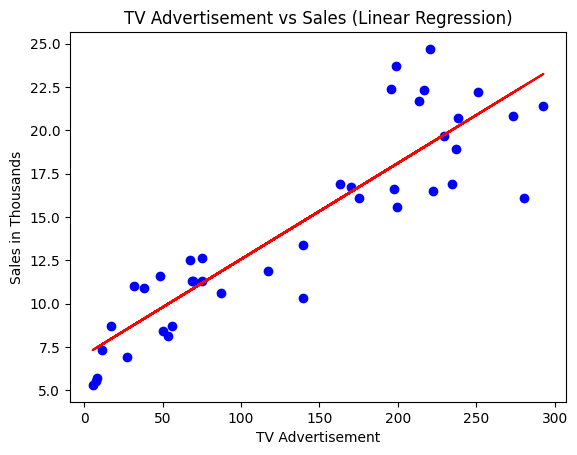

In [227]:
### Plotting of Ridge Regression

plt.scatter(X_test, y_test, color='blue')

plt.plot(X_test, yPredictedRidge, color='red')

plt.title('TV Advertisement vs Sales (Linear Regression)')

plt.xlabel('TV Advertisement')

plt.ylabel('Sales in Thousands')

<h1 align = center><font color = '#FF35AB'> Lasso Regression </h1>

#### What is the Lasso Regression ?

Lasso regression is a regularized version of linear regression that adds a penalty term to the loss function to prevent overfitting. The penalty term is a sum of the absolute values of the coefficients (L1 regularization), or the sum of the squares of the coefficients (L2 regularization).

The main difference between Lasso Regression and Linear Regression is that Lasso Regression tends to shrink the coefficients towards zero, while Linear Regression does not. This can help prevent overfitting by reducing the variance of the model.

Formula :

y = b0 + b1 * X + alpha * sum(abs(b))

#### How does Lasso Regression work?

It starts by finding the best-fit coefficients using the least squares method, but then adjusts them to minimize the sum of the squared differences between the predicted and actual values, plus a penalty term. The penalty term is a sum of the absolute values of the coefficients (L1 regularization), or the sum of the squares of the coefficients (L2 regularization).

After obtaining the coefficients, the model can be used to predict the target variable for new data points.


#### When To Use This ?

- When you have a large number of features and want to simplify the model by removing irrelevant features.

- When you have a lot of noise in your data and want to remove the noise by shrinking the coefficients towards zero.

- When you have a large dataset and want to find the most important features for predicting the target variable.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.

#### Difference between Ridge Regression and Lasso Regression


- Lasso regression tends to shrink the coefficients towards zero, while Ridge regression does not. This can help prevent overfitting by reducing the variance of the model.

- Lasso regression can lead to feature selection, as some coefficients will be exactly zero. This can be useful when you have a large number of features and want to simplify the model by removing irrelevant features.

- Lasso regression can be computationally expensive, as it involves the optimization of a convex function. Ridge regression can be more efficient and faster.





In [228]:
# Lasso Regression
lassoModel = Lasso(alpha=0.1)
lassoModel.fit(X_train, y_train)

yPredictedLasso = lassoModel.predict(X_test)
mseLasso = mean_squared_error(y_test, yPredictedLasso)
r2Lasso = r2_score(y_test, yPredictedLasso)


print(f"b = {lassoModel.intercept_}")
print(f"m = {lassoModel.coef_[0]}")

print(f"Lasso Regression - MSE: {mseLasso}, R^2: {r2Lasso}")


b = 7.009226746843577
m = 0.05546882363132377
Lasso Regression - MSE: 6.10107045346801, R^2: 0.8025613828158864


### Plotting



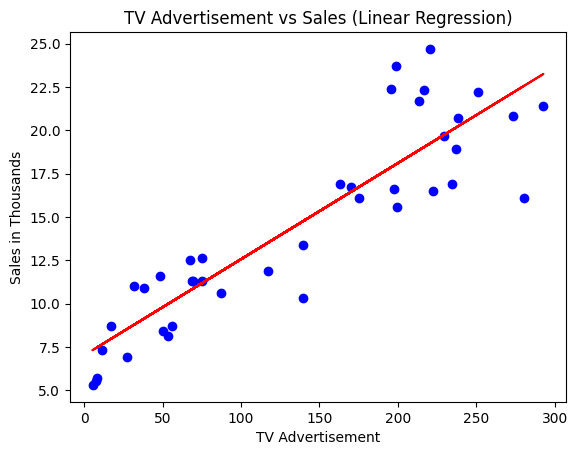

In [229]:

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, yPredictedLasso, color='red')

plt.title('TV Advertisement vs Sales (Linear Regression)')
plt.xlabel('TV Advertisement')
plt.ylabel('Sales in Thousands')

plt.show()




<h1 align = center><font color = '#FFFF00'> Decision Tree Regression </h1>

#### What is Decision Tree Regression ?

Decision tree regression is a supervised learning algorithm that uses a tree-like model to predict continuous target variables. The algorithm splits the dataset into smaller subsets based on specific criteria, such as the feature and threshold value.

The main idea behind decision tree regression is to find the best-split points in the dataset to minimize the mean squared error (MSE). The best split point is chosen by finding the feature and threshold value that minimize the MSE while maximizing the information gain (Gini impurity or entropy).

#### How does Decision Tree Regression work?

- Start with the entire dataset as the root node.

- Split the dataset into two subsets based on a specific feature and threshold value.

- Choose the feature and threshold value that minimize the MSE while maximizing the information gain (Gini impurity or entropy).

- Repeat the process recursively for each subset until the desired depth is reached or a stopping criterion is met (e.g., minimum number of samples in a leaf node).

- Make predictions for new data points by following the tree structure from the root node to the leaf node.

#### When To Use This ?

- When you have continuous target variables and want to predict the target variable based on a set of features.

- When you want to handle non-linear relationships between the features and the target variable.

- When you have a large dataset and want to find the most important features for predicting the target variable.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.



### Implementation

In [230]:
# Decision Tree Regression
treeModel = DecisionTreeRegressor(max_depth=3)
treeModel.fit(X_train, y_train)

yPredictedTree = treeModel.predict(X_test)
mseTree = mean_squared_error(y_test, yPredictedTree)
r2Tree = r2_score(y_test, yPredictedTree)

print(f"b = Not Available")
print(f"m = Not Available")


print(f"Decision Tree Regression - MSE: {mseTree}, R^2: {r2Tree}")


b = Not Available
m = Not Available
Decision Tree Regression - MSE: 6.055696772961459, R^2: 0.8040297344443577


### Plotting

Text(0.5, 1.0, 'Capita Income vs Year (Decision Tree Regression)')

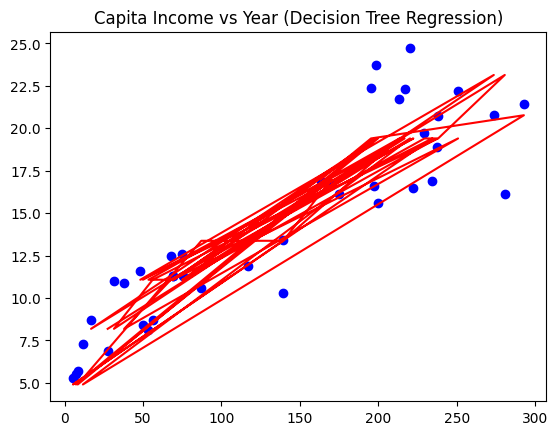

In [231]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, yPredictedTree, color='red')
plt.title('Capita Income vs Year (Decision Tree Regression)')




<h1 align = center><font color = '#FAAFBB'>Stochastic Gradient Descent Regressor</h1>



#### What is Stochastic Gradient Descent (SGD) Regression?

Stochastic Gradient Descent (SGD) is an optimization algorithm used for training machine learning models. It is an iterative method that updates the model's parameters in a way that minimizes the cost function by taking small steps in the direction of the gradient.

The main idea behind SGD is to use a subset of the training data instead of the entire dataset to update the model's parameters. This allows SGD to converge faster and find better solutions compared to batch gradient descent.

#### How does SGD Regression work?

- Start with initial values for the model's parameters.

- Iterate over the training data in a random order.

- For each data point, update the model's parameters using the gradient of the cost function with respect to the parameters.

- Repeat the process until the desired number of iterations or convergence criteria is met.

#### When To Use This?

- When you have a large dataset and want to train a machine learning model faster.

- When you have a lot of noise in your data and want to improve the performance of the model by reducing the variance.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.

#### Difference between SGD Regression and Other Regression Algorithms

- SGD Regression is faster and more efficient than other regression algorithms when dealing with large datasets.

- SGD Regression can be used for both regression and classification tasks.

- SGD Regression can handle outliers and missing values by using a loss function that is less sensitive to outliers.

- SGD Regression can be sensitive to the scale of the features and may require feature scaling.

- SGD Regression can be used with different types of loss functions (e.g., mean squared error, hinge loss) and regularization techniques (e.g., L1 regularization, L2 regularization).

- SGD Regression is suitable for online learning, where the training data is continuously available.

- SGD Regression can be used for distributed computing, where the training data is split across multiple machines and processed in parallel.



In [232]:
### Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementation

sgdModel = SGDRegressor(loss='squared_error', penalty='l2', max_iter=1000, tol=0.0001)
sgdModel.fit(X_train_scaled, y_train)


yPredictedSGD = sgdModel.predict(X_test_scaled)
mseSGD = mean_squared_error(y_test, yPredictedSGD)
r2SGD = r2_score(y_test, yPredictedSGD)

print(f"b = {sgdModel.intercept_[0]}")
print(f"m = {sgdModel.coef_[0]}")

print(f"Stochastic Gradient Descent Regression - MSE: {mseSGD}, R^2: {r2SGD}")



b = 15.329663770621945
m = 4.669475572018983
Stochastic Gradient Descent Regression - MSE: 6.100739173545981, R^2: 0.8025721034673206


Text(0.5, 1.0, 'Capita Income vs Year (Stochastic Gradient Descent Regression)')

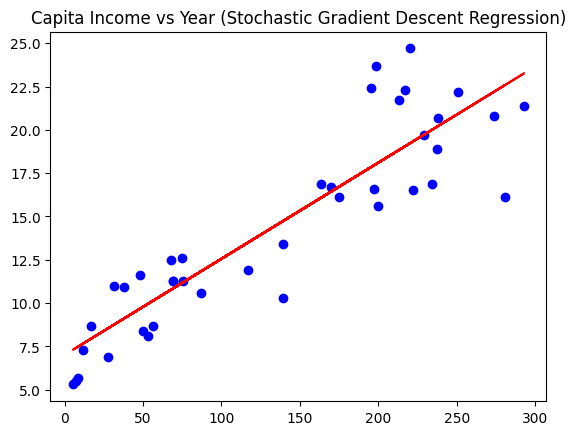

In [233]:
### Plotting

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, yPredictedSGD, color='red')
plt.title('Capita Income vs Year (Stochastic Gradient Descent Regression)')



<h1 align = center><font color = '#400DB33'>Stochastic Gradient Descent Regressor</h1>


#### What is Polynomial Regression ?

Polynomial regression is a form of regression analysis in which the relationship between the independent variable(s) x and the dependent variable y is modeled as an nth degree polynomial of x.

The main idea behind polynomial regression is to find the best-fit polynomial function that fits the given dataset. Polynomial regression can capture non-linear relationships between the features and the target variable.

#### How does Polynomial Regression work?

- Choose a suitable degree for the polynomial function (e.g., degree 2 for a linear regression model, degree 3 for a quadratic regression model, etc.).

- Fit a polynomial regression model to the training data using the chosen degree.

- Make predictions for new data points by evaluating the polynomial function at the given input values.

#### When To Use This?

- When you have non-linear relationships between the features and the target variable.

- When you want to capture complex patterns in the data.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.

#### Difference between Polynomial Regression and Other Regression Algorithms

- Polynomial regression can capture non-linear relationships between the features and the target variable.

- Polynomial regression can handle outliers and missing values by using robust regression techniques such as RANSAC or LOESS.

- Polynomial regression can be sensitive to the scale of the features and may require feature scaling.

- Polynomial regression can be used for both regression and classification tasks.

- Polynomial regression can be used with different types of loss functions (e.g., mean squared error, hinge loss) and regularization techniques (e.g., L1 regularization, L2 regularization).

- Polynomial regression can be used for feature engineering, such as creating new features by combining existing features.

- Polynomial regression can be used for distributed computing, where the training data is split across multiple machines and processed in parallel.



### Implementation

In [244]:

polyModel = PolynomialFeatures(degree = 2)

X_train_poly = polyModel.fit_transform(X_train)

polyRegression = LinearRegression()

polyRegression.fit(X_train_poly, y_train)

yPredictedPoly = polyRegression.predict(polyModel.transform(X_test))

msePoly = mean_squared_error(y_test, yPredictedPoly)

r2Poly = r2_score(y_test, yPredictedPoly)

print(f"b = {polyRegression.intercept_}")

print(f"m = {polyRegression.coef_}")


print(f"Polynomial Regression - MSE: {msePoly}, R^2: {r2Poly}")




b = 5.902256984725987
m = [ 0.00000000e+00  7.81416832e-02 -7.75453825e-05]
Polynomial Regression - MSE: 5.682891191398347, R^2: 0.8160942105168312




<h1 align = center><font color = '#F12F55'>Support Vector Regression</h1>


#### What is Support Vector Regression (SVR) ?

Support Vector Regression (SVR) is a supervised learning algorithm used for regression tasks. It finds the optimal hyperplane that separates the data points into two classes by maximizing the margin between the closest data points. SVR can handle both linear and non-linear relationships between the features and the target variable.

#### How does SVR work?

- Choose a kernel function (e.g., linear, polynomial, radial basis function) to transform the input features into a higher-dimensional space.

- Fit an SVR model to the training data using the chosen kernel function and hyperparameters.

- Make predictions for new data points by evaluating the SVR model at the given input values.

#### When To Use This?

- When you have non-linear relationships between the features and the target variable.

- When you want to capture complex patterns in the data.

#### Model Evaluation

The Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.

#### Difference between SVR and Other Regression Algorithms

- SVR can handle both linear and non-linear relationships between the features and the target variable.

- SVR can handle outliers and missing values by using robust regression techniques such as RANSAC or LOESS.

- SVR can be sensitive to the scale of the features and may require feature scaling.

- SVR can be used for both regression and classification tasks.

- SVR can be used with different types of loss functions (e.g., mean squared error, hinge loss) and regularization techniques (e.g., L1 regularization, L2 regularization).

- SVR can be used for distributed computing, where the training data is split across multiple machines and processed in parallel.



### Implementation

In [269]:

svrModel = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svrModel.fit(X_train_scaled, y_train)

yPredictedSVR = svrModel.predict(X_test_scaled)

mseSVR = mean_squared_error(y_test, yPredictedSVR)

r2SVR = r2_score(y_test, yPredictedSVR)

print(f"b = {svrModel.intercept_[0]}")

# print(f"m = {svrModel.coef_}")

# print(f"m = {svrModel.coef_[0]}")

print(f"Support Vector Regression - MSE: {mseSVR}, R^2: {r2SVR}")


b = 9.388926716237517
Support Vector Regression - MSE: 5.6205024691159755, R^2: 0.818113191144782


### Plotting

Text(0.5, 1.0, 'Capita Income vs Year (Support Vector Regression)')

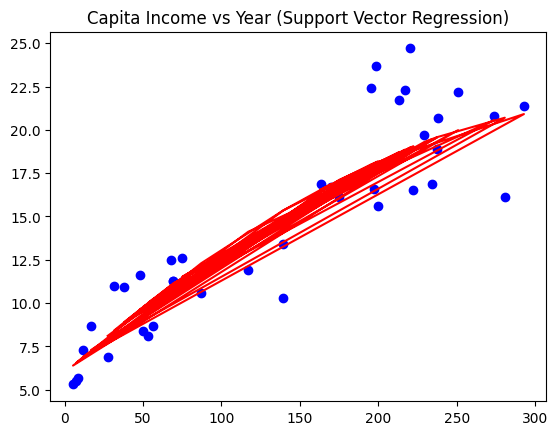

In [270]:


plt.scatter(X_test, y_test, color='blue')

plt.plot(X_test, yPredictedSVR, color='red')

plt.title('Capita Income vs Year (Support Vector Regression)')


